In [31]:
# Libraries Import
import gspread
import pandas as pd
from scipy.io import arff
from IPython.display import SVG, Markdown, HTML, display
from ipywidgets import TwoByTwoLayout

# TO TEST

import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import ipywidgets as widgets
import warnings
warnings.filterwarnings('ignore')

# XAI Questionnaire Analyser

The following notebook has been created to analyse the results from the XAI questionnaire titled "Survey of the interpretability of decision trees", available at this [Github repository](https://github.com/marcozenere/XAI_Survey). The goal of the questionnaire was to evaluate the interpretability of decision trees.

The notebook is divided into sections, and each of them takes its name from those present in the XAI questionnaire that will analyze this notebook. Each section will explain what information was provided to the survey participants and highlight the results obtained.

---

## Dataset

The data used in this questionnaire is part of the wine dataset provided by [UCI](https://archive.ics.uci.edu/ml/datasets/wine). These data are the results of a chemical analysis of wines grown in the same region in Italy but derived from three different cultivars. The analysis determined the quantities of 13 constituents found in each of the three types of wines. Below, you can find the first ten rows of the dataset.

In [2]:
# Dataset Load
data = arff.loadarff("./Dataset/WINE.txt.arff")
dataset = pd.DataFrame(data[0])

In [18]:
def labelConversion(label):
    if label == b'1':
        return '1'
    elif label == b'2':
        return '2'
    else:
        return '3'

dataset['Class'] = dataset['Class'].apply(lambda x: labelConversion(x))

In [23]:
dataset.head(10)

,Alcohol,MalicAcid,Ash,AlcalinityOfAsh,Magnesium,TotalPhenols,flavanoids,NonflavanoidsPhenols,Proanthocyanins,ColorIntensity,Hue,OD280-OD315,Proline,Class
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,1
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,1
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,1
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,1
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,1
5,14.20,1.76,2.45,15.2,112.0,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450.0,1
6,14.39,1.87,2.45,14.6,96.0,2.50,2.52,0.30,1.98,5.25,1.02,3.58,1290.0,1
7,14.06,2.15,2.61,17.6,121.0,2.60,2.51,0.31,1.25,5.05,1.06,3.58,1295.0,1
8,14.83,1.64,2.17,14.0,97.0,2.80,2.98,0.29,1.98,5.20,1.08,2.85,1045.0,1
9,13.86,1.35,2.27,16.0,98.0,2.98,3.15,0.22,1.85,7.22,1.01,3.55,1045.0,1


In [4]:
gc = gspread.service_account(filename = 'Credentials/survey_bot.json')

In [5]:
sh = gc.open('SurveyAnswers')

In [6]:
rows = sh.sheet1.get_all_values()
labels = rows.pop(0)

In [7]:
data = pd.DataFrame(data = rows, columns = labels)

## Explanation

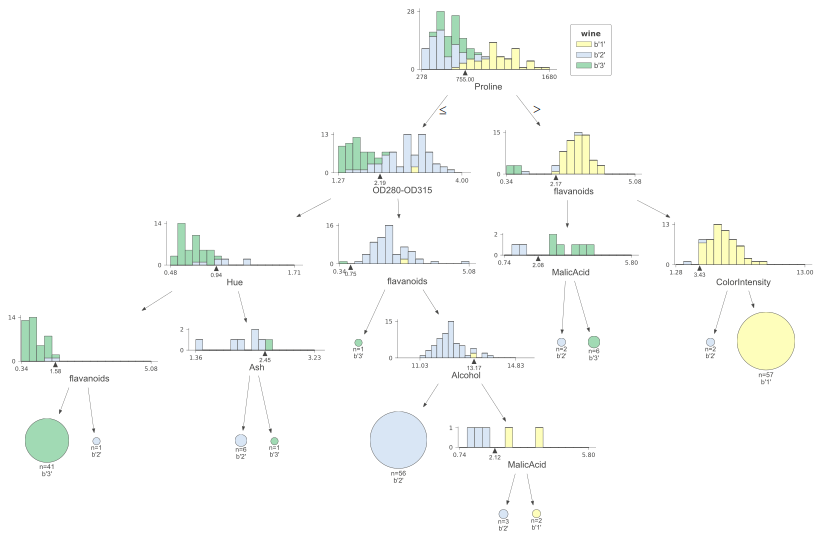

In [48]:
display(SVG(filename='./Images/Decision_Tree_5_layers.svg'))

---

## Comprehension Test Results

The comprehension test section aims to test the notions acquired by the participants of the questionnaire and to verify the goodness of the participants' mental model. The test is constructed around the sample with the following features.

In [9]:
comprehension_test_sample = dataset.iloc[1][:-1].to_frame()
comprehension_test_sample.rename(columns = {comprehension_test_sample.columns[0]:''}, inplace = True)
comprehension_test_sample.transpose()

,Alcohol,MalicAcid,Ash,AlcalinityOfAsh,Magnesium,TotalPhenols,flavanoids,NonflavanoidsPhenols,Proanthocyanins,ColorIntensity,Hue,OD280-OD315,Proline
,13.2,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.4,1050.0


The questionnaire participants have to answer two questions based on the visual explanation that represents the model in the form of a decision tree. The visual explanation provided is presented below.

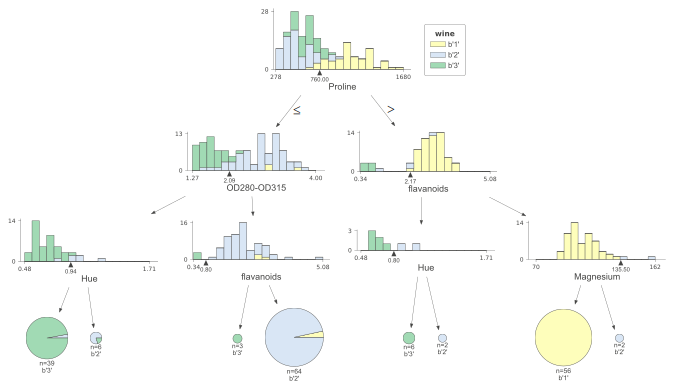

In [10]:
display(SVG(filename='./Images/Decision_Tree_3_layers.svg'))

The two questions posed to the participants of the questionnaire are the following:
* Q1: Which class correspond the wine with the following features? Correct Answer: Class 2
* Q2: Which of the following features/attributes did you consider for the classification? Correct Answer: Proline, OD280/OD315, and Flavanoids

In [11]:
comprehension_test_answers = data['Warm-Up'].to_list()
comprehension_test_correct_answers = data['Warm-Up Correct Answers']

In [13]:
comprehension_test_q1 = 0
comprehension_test_q2 = 0

for cell_1, cell_2 in zip(comprehension_test_answers,comprehension_test_correct_answers):
    user_answers = cell_1.split(', ')
    correct_answers = cell_2.split(', ')
    
    if user_answers[0] == correct_answers[0]:
        comprehension_test_q1 += 1
    
    if user_answers[1] == correct_answers[1]:
        comprehension_test_q2 += 1

In [20]:
q1_accuracy = round(comprehension_test_q1 / data.shape[0],3)
q2_accuracy = round(comprehension_test_q2 / data.shape[0],3)
overall_accuracy = round((comprehension_test_q1 + comprehension_test_q2) / (data.shape[0] * 2), 3)

In [22]:
Markdown("""The Comprehension Test section results are:
* Q1 accuracy is {}
* Q2 accuracy is {}
* The overall accuracy is {}""".format(q1_accuracy, q2_accuracy, overall_accuracy))

The Comprehension Test section results are:
* Q1 accuracy is 0.333
* Q2 accuracy is 0.333
* The overall accuracy is 0.333

---

## Participants' Demographic Analysis

In [24]:
Markdown("""The questionnaire was completed by {} participants. Below you will find some information about them.""".format(data.shape[0]))

The questionnaire was completed by 3 participants. Below you will find some information about them.

In [7]:
# Labels
participant_Gender = ['Male','Female','Other','Prefer not to say']
participant_Age = ['18-20', '21-29', '30-39', '40-49', '50-59', '60 or older']
participant_Education_Level = ['Less than high school degree', 'High school degree or equivalent', 'Undergraduate', 'Graduate']
participant_English_Level = ['Beginner (A1)', 'Elementary (A2)', 'Lower Intermidiate (B1)', 'Upper Intermidiate (B2)', 'Advanced (C1)', 'Proficient (C2)']

In [9]:
participant_gender_values = []
for i,label in zip(range(1, len(participant_Gender) + 1),participant_Gender.copy()):
    counter = int(data[['Participant Gender']].eq(str(i)).sum().values)
    if counter != 0:
        participant_gender_values.append(counter)
    else:
        participant_Gender.remove(label)

participant_age_values = []
for i,label in zip(range(1, len(participant_Age) + 1), participant_Age.copy()):
    counter = int(data[['Participant Age']].eq(str(i)).sum().values)
    if counter != 0:
        participant_age_values.append(counter)
    else:
        participant_Age.remove(label)

participant_education_values = []
for i,label in zip(range(1, len(participant_Education_Level) + 1), participant_Education_Level.copy()):
    counter = int(data[['Participant Education']].eq(str(i)).sum().values)
    if counter != 0:
        participant_education_values.append(counter)
    else:
        participant_Education_Level.remove(label)
        
participant_english_level_values = []
for i,label in zip(range(1, len(participant_English_Level) + 1), participant_English_Level.copy()):
    counter = int(data[['Participant English Level']].eq(str(i)).sum().values)
    if counter != 0:
        participant_english_level_values.append(counter)
    else:
        participant_English_Level.remove(label)

### Participants Gender

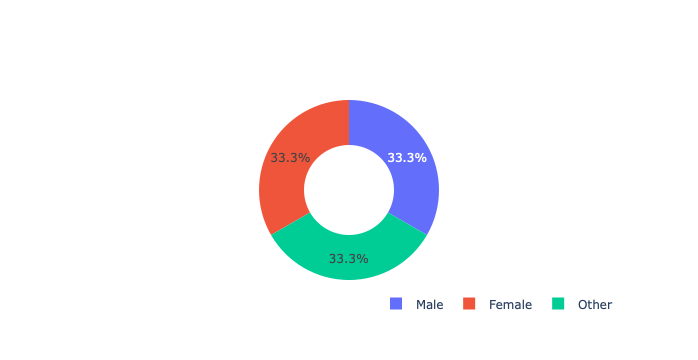

In [67]:
pie_1 = go.Figure(data=[go.Pie(
    name ='Participant Gender',
    labels = participant_Gender,
    values = participant_gender_values,
     hole=.5
)])

pie_1.update_layout(legend=dict(
    orientation="h",
    yanchor="top",
    y= -0.05,
    xanchor="right",
    x=1
))
#pie_1.show()

### Participants Age

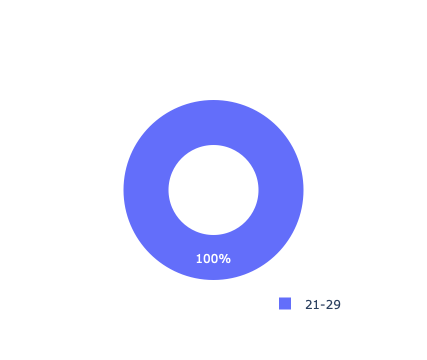

In [68]:
pie_2 = go.Figure(data=[go.Pie(
    name ='Participant Age',
    labels = participant_Age,
    values = participant_age_values,
     hole=.5
)])

pie_2.update_layout(legend=dict(
    orientation="h",
    yanchor="top",
    y= -0.05,
    xanchor="right",
    x=1
))
#pie_2.show()

### Participants Education Level

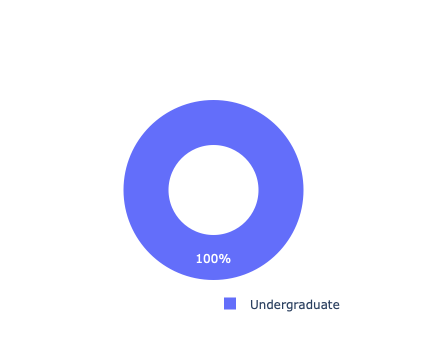

In [69]:
pie_3 = go.Figure(data=[go.Pie(
    name ='Participant Education Level',
    labels = participant_Education_Level,
    values = participant_education_values,
     hole=.5
)])

pie_3.update_layout(legend=dict(
    orientation="h",
    yanchor="top",
    y= -0.05,
    xanchor="right",
    x=1
))

### Participants English Level

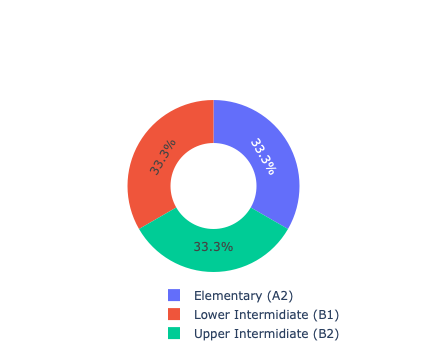

In [66]:
pie_4 = go.Figure(data=[go.Pie(
    name ='Participant English Level',
    labels = participant_English_Level,
    values = participant_english_level_values,
     hole=.5
)])

pie_4.update_layout(legend=dict(
    orientation="h",
    yanchor="top",
    y= -0.05,
    xanchor="right",
    x=1
))
#pie_4.show()